# Exploratory data analysis for vtalks.net

## Table of contents:

* [Introduction](#introduction)
    * [Setup & Configuration](#setup-and-configuration)
    * [Load the Data Set](#load-the-data-set)
    
* [Youtube Statistics Analysis](#youtube-statistics-analysis)
    * [Youtube Views](#youtube-views)
    * [Youtube Likes](#youtube-likes)
    * [Youtube Dislikes](#youtube-dislikes)
    * [Youtube Favorites](#youtube-favorites)
    
* [Statistics Analysis](#statistics-analysis)
    * [Views](#views)
    * [Likes](#likes)
    * [Dislikes](#dislikes)
    * [Favorites](#favorites)
    
* [Youtube Statistics Histograms](#youtube-statistics-histograms)
    * [Youtube Views Histogram](#youtube-views-histogram)
    * [Youtube Likes Histogram](#youtube-likes-histogram)
    * [Youtube Dislikes Histogram](#youtube-dislikes-histogram)
    * [Youtube Favorites Histogram](#youtube-favorites-histogram)
    
* [Statistics Histograms](#statistics-histograms)
    * [Views Histogram](#views-histogram)
    * [Likes Histogram](#likes-histogram)
    * [Dislikes Histogram](#dislikes-histogram)
    * [Favorites Histogram](#favorites-histogram)

## Introduction <a class="anchor" id="introduction"></a>

This jupyter network describes an exploratory data analysis for a data set of talks published on [vtalks.net](http://www.vtalks.net) website.

We are going to use numpy and pandas to load and analyze our dataset, and we will use matplotlib python libraries for
plotting the results.

In [9]:
!pwd

/Users/raul/Projects/vtalks/jupyter/2010


### Setup & Configuration <a class="anchor" id="setup-and-configuration"></a>

In [10]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn

Now we configure matplotlib to ensure we have somne pretty plots :)

In [11]:
%matplotlib inline

seaborn.set()
plt.rc('figure', figsize=(16,8))
plt.style.use('bmh')

plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

### Load the Data Set <a class="anchor" id="load-the-dataset"></a>

And finally load our dataset. Notice that there are different data sets available.

The first one is a general data set with all the information available from the start (around mid 2010) until now. Then there are the same data sets but splitted by year.

In [12]:
# data_source = "../../.dataset/vtalks_dataset_2018.csv"
# data_source = "../../.dataset/vtalks_dataset_2017.csv"
# data_source = "../../.dataset/vtalks_dataset_2016.csv"
# data_source = "../../.dataset/vtalks_dataset_2015.csv"
# data_source = "../../.dataset/vtalks_dataset_2014.csv"
# data_source = "../../.dataset/vtalks_dataset_2013.csv"
# data_source = "../../.dataset/vtalks_dataset_2012.csv"
# data_source = "../../.dataset/vtalks_dataset_2011.csv"
data_source = "../../.dataset/vtalks_dataset_2010.csv"
# data_source = "../.dataset/vtalks_dataset_all.csv"

data_set = pd.read_csv(
    data_source,
    parse_dates=[1],
    dtype={
        'id': int,
        'youtube_view_count': int, 
        'youtube_like_count': int,
        'youtube_dislike_count': int,
        'youtube_favorite_count': int,
        'view_count': int, 
        'like_count': int,
        'dislike_count': int,
        'favorite_count': int,
    })

In [13]:
data_set.dtypes

id                                 int64
created                   datetime64[ns]
youtube_view_count                 int64
youtube_like_count                 int64
youtube_dislike_count              int64
youtube_favorite_count             int64
view_count                         int64
like_count                         int64
dislike_count                      int64
favorite_count                     int64
dtype: object

In [14]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 10 columns):
id                        11 non-null int64
created                   11 non-null datetime64[ns]
youtube_view_count        11 non-null int64
youtube_like_count        11 non-null int64
youtube_dislike_count     11 non-null int64
youtube_favorite_count    11 non-null int64
view_count                11 non-null int64
like_count                11 non-null int64
dislike_count             11 non-null int64
favorite_count            11 non-null int64
dtypes: datetime64[ns](1), int64(9)
memory usage: 960.0 bytes


In [15]:
data_set.head()

,id,created,youtube_view_count,youtube_like_count,youtube_dislike_count,youtube_favorite_count,view_count,like_count,dislike_count,favorite_count
0,7191,2010-06-12 06:18:27,3063,10,0,0,8,0,0,0
1,7190,2010-06-12 06:00:14,10257,73,1,0,12,0,0,0
2,7189,2010-06-12 04:47:15,38661,309,14,0,10,0,0,0
3,7188,2010-06-12 04:36:25,5825,46,0,0,10,0,0,0
4,7187,2010-06-12 03:58:38,1304,3,0,0,5,0,0,0


In [16]:
data_set.describe()

,id,youtube_view_count,youtube_like_count,youtube_dislike_count,youtube_favorite_count,view_count,like_count,dislike_count,favorite_count
count,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.0,11.0,11.0
mean,7185.454545,15808.181818,110.000000,2.818182,0.0,9.727273,0.0,0.0,0.0
std,3.777926,22922.153602,187.304565,4.512609,0.0,3.319365,0.0,0.0,0.0
min,7180.000000,1304.000000,1.000000,0.000000,0.0,5.000000,0.0,0.0,0.0
25%,7182.500000,2829.500000,3.500000,0.000000,0.0,8.000000,0.0,0.0,0.0
50%,7185.000000,3965.000000,28.000000,1.000000,0.0,10.000000,0.0,0.0,0.0
75%,7188.500000,19945.000000,103.000000,3.500000,0.0,10.000000,0.0,0.0,0.0
max,7191.000000,73788.000000,602.000000,14.000000,0.0,18.000000,0.0,0.0,0.0


In [17]:
pp.ProfileReport(data_set)

Number of variables,10
Number of observations,11
Total Missing (%),0.0%
Total size in memory,960.0 B
Average record size in memory,87.3 B
Numeric,4
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,5


## Youtube Statistics Analysis <a class="anchor" id="youtube-statistics-analysis"></a>

### Youtube Views <a class="anchor" id="youtube-views"></a>

In [18]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'youtube_views': data_set.youtube_view_count,
})

#### Descriptive analysis:

##### Count

In [19]:
count = data_set.youtube_view_count.count()
"Count: {:d}".format(count)

'Count: 11'

##### Minimum, Index Minimum, Maximum, Index Maximum

In [20]:
min = data_set.youtube_view_count.min()
max = data_set.youtube_view_count.max()
index_min = data_set.youtube_view_count.idxmin()
index_max = data_set.youtube_view_count.idxmax()
"Minimum: {:d} Index Minimum: {:d} - Maximum {:d} Index Maximum: {:d}".format(min, index_min, max, index_max)

'Minimum: 1304 Index Minimum: 4 - Maximum 73788 Index Maximum: 5'

##### Quantile 50%

In [21]:
quantile = data_set.youtube_view_count.quantile()
"Quantile 50%: {:f}".format(quantile)

'Quantile 50%: 3965.000000'

##### Sum

In [22]:
sum = data_set.youtube_view_count.sum()
"Sum: {:d}".format(sum)

'Sum: 173890'

##### Mean

In [23]:
mean = data_set.youtube_view_count.mean()
"Mean: {:f}".format(mean)

'Mean: 15808.181818'

##### Arithmetic median (50% quantile) of values

In [24]:
median = data_set.youtube_view_count.median()
"Arithmetic median (50% quantile) of values {:f}".format(median)

'Arithmetic median (50% quantile) of values 3965.000000'

##### Mean absolute deviation from mean value

In [25]:
mad = data_set.youtube_view_count.mad()
"Mean absolute deviation from mean value {:f}".format(mad)

'Mean absolute deviation from mean value 17210.446281'

##### Product of all values

In [26]:
prod = data_set.youtube_view_count.prod()
"Product of all values {:f}".format(prod)

'Product of all values -382432825671024640.000000'

##### Sample variance of values

In [27]:
var = data_set.youtube_view_count.var()
"Sample variance of values {:f}".format(var)

'Sample variance of values 525425125.763636'

##### Sample standard deviation of values

In [28]:
std = data_set.youtube_view_count.std()
"Sample standard deviation of values {:f}".format(std) 

'Sample standard deviation of values 22922.153602'

##### Sample skewness (third moment) of values

In [29]:
skew = data_set.youtube_view_count.skew()
"Sample skewness (third moment) of values {:f}".format(skew)

'Sample skewness (third moment) of values 1.972264'

##### Sample kurtosis (fourth moment) of values

In [30]:
kurt = data_set.youtube_view_count.kurt()
"Sample kurtosis (fourth moment) of values {:f}".format(kurt)

'Sample kurtosis (fourth moment) of values 3.674757'

##### Cumsum

In [31]:
cumsum = data_set.youtube_view_count.cumsum()
cumsum.head()

0     3063
1    13320
2    51981
3    57806
4    59110
Name: youtube_view_count, dtype: int64

##### Cummin

In [32]:
cummin = data_set.youtube_view_count.cummin()
cummin.head()

0    3063
1    3063
2    3063
3    3063
4    1304
Name: youtube_view_count, dtype: int64

##### Cummax

In [33]:
cummax = data_set.youtube_view_count.cummin()
cummax.head()

0    3063
1    3063
2    3063
3    3063
4    1304
Name: youtube_view_count, dtype: int64

##### Cumprod

In [34]:
cumprod = data_set.youtube_view_count.cumprod()
cumprod.head()

0                   3063
1               31417191
2          1214620021251
3       7075161623787075
4   -9220733316291205816
Name: youtube_view_count, dtype: int64

##### Diff

In [35]:
diff = data_set.youtube_view_count.diff()
diff.head()

0        NaN
1     7194.0
2    28404.0
3   -32836.0
4    -4521.0
Name: youtube_view_count, dtype: float64

##### Percent change

In [36]:
pct_change = data_set.youtube_view_count.pct_change()
pct_change.head()

0         NaN
1    2.348678
2    2.769231
3   -0.849331
4   -0.776137
Name: youtube_view_count, dtype: float64

#### Bar Plot

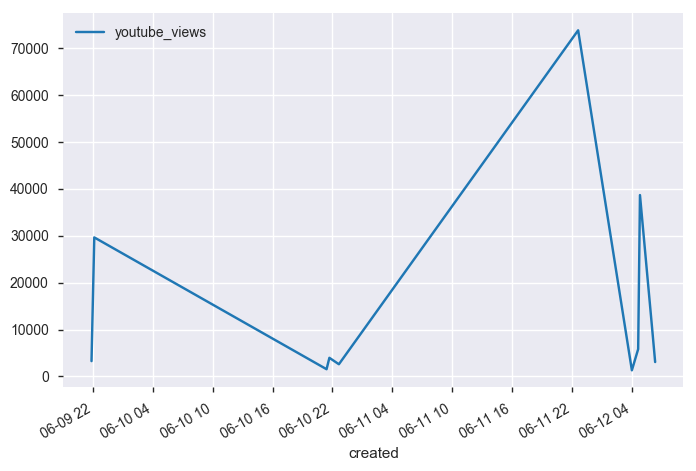

In [37]:
plot_data_set.plot(x='created');

### Youtube Likes <a class="anchor" id="youtube-likes"></a>

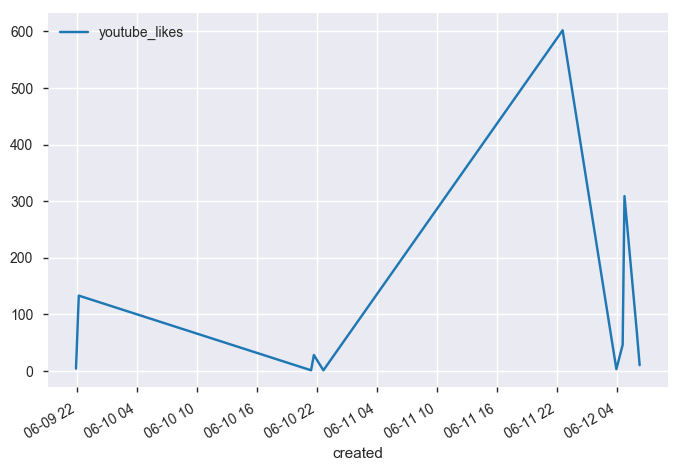

In [38]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'youtube_likes': data_set.youtube_like_count,
})
plot_data_set.plot(x='created');

### Youtube Dislikes <a class="anchor" id="youtube-dislikes"></a>

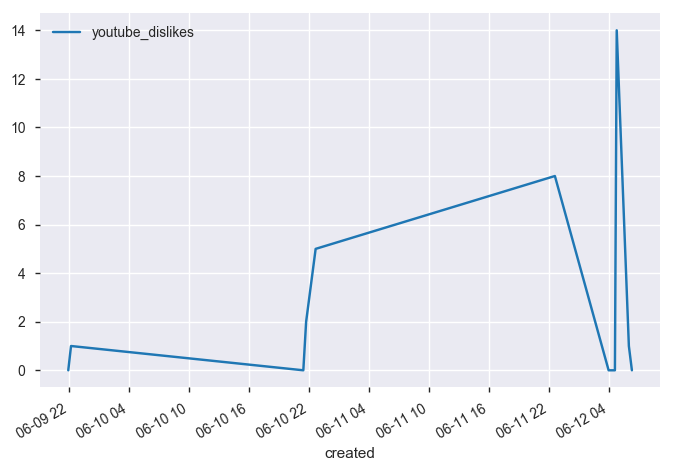

In [39]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'youtube_dislikes': data_set.youtube_dislike_count,
})
plot_data_set.plot(x='created');

### Youtube Favorites <a class="anchor" id="youtube-favorites"></a>

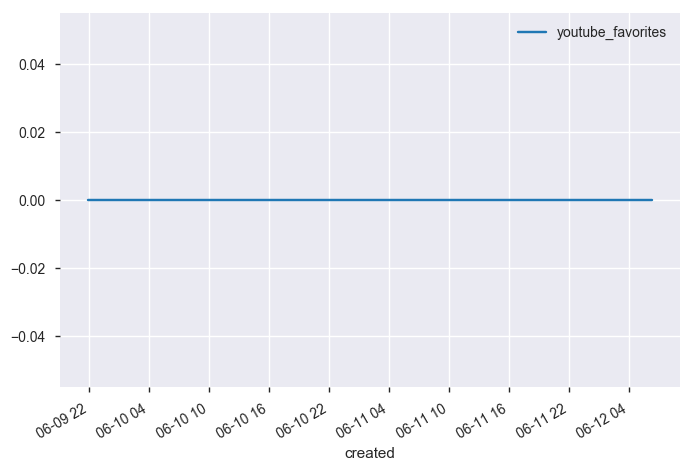

In [40]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'youtube_favorites': data_set.youtube_favorite_count,
})
plot_data_set.plot(x='created');

## Statistics Analysis <a class="anchor" id="statistics-analysis"></a>

### Views <a class="anchor" id="views"></a>

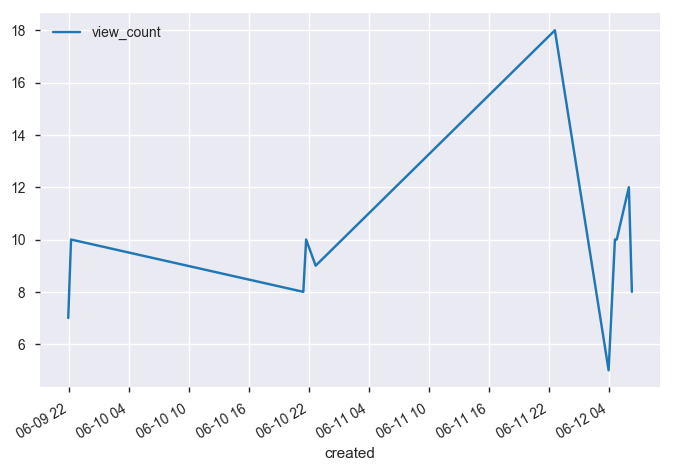

In [41]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'view_count': data_set.view_count,
})
plot_data_set.plot(x='created');

### Likes <a class="anchor" id="likes"></a>

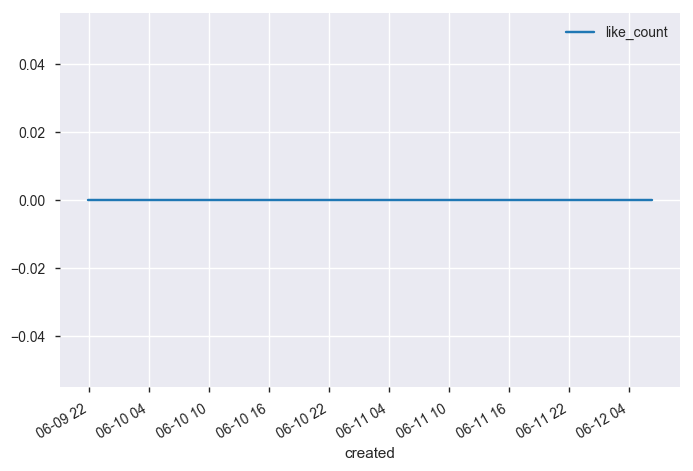

In [42]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'like_count': data_set.like_count,
})
plot_data_set.plot(x='created');

### Dislikes <a class="anchor" id="dislikes"></a>

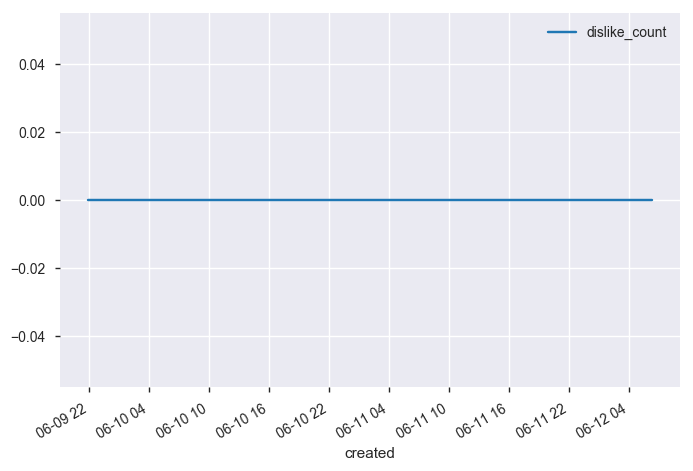

In [43]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'dislike_count': data_set.dislike_count,
})
plot_data_set.plot(x='created');

### Favorites <a class="anchor" id="favorites"></a>

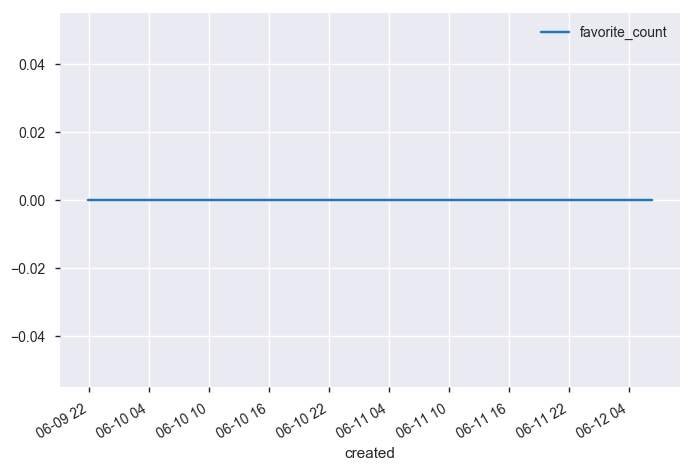

In [44]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'favorite_count': data_set.favorite_count,
})
plot_data_set.plot(x='created');

## Youtube Statistics Histograms <a class="anchor" id="youtube-statistics-histograms"></a>

A histogram is an accurate graphical representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable (quantitative variable).

Basically, histograms are used to represent data given in form of some groups. X-axis is about bin ranges where Y-axis talks about frequency.

### Youtube Views Histogram <a class="anchor" id="youtube-views-histogram"></a>

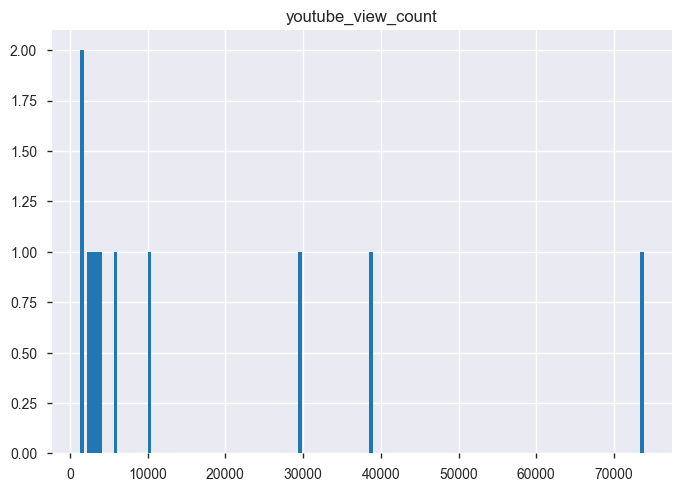

In [45]:
plot_data_set = pd.DataFrame({'youtube_view_count': data_set.youtube_view_count}, columns=['youtube_view_count'])
plot_data_set.hist(bins=150);

### Youtube Like Histogram <a class="anchor" id="youtube-likes-histogram"></a>

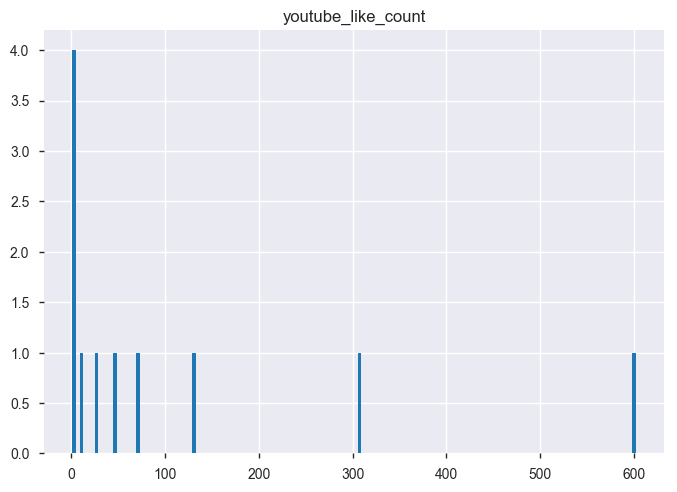

In [46]:
plot_data_set = pd.DataFrame({'youtube_like_count': data_set.youtube_like_count}, columns=['youtube_like_count'])
plot_data_set.hist(bins=150);

### Youtube Dislike Histogram <a class="anchor" id="youtube-dislikes-histogram"></a>

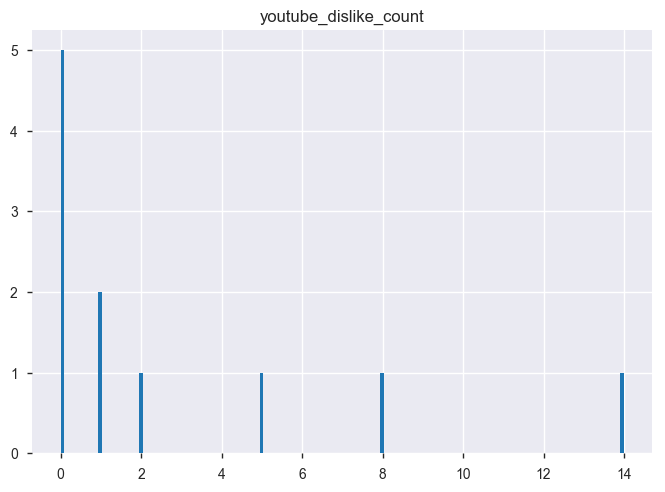

In [47]:
plot_data_set = pd.DataFrame({'youtube_dislike_count': data_set.youtube_dislike_count}, columns=['youtube_dislike_count'])
plot_data_set.hist(bins=150);

### Youtube Favorite Histogram <a class="anchor" id="youtube-favorites-histogram"></a>

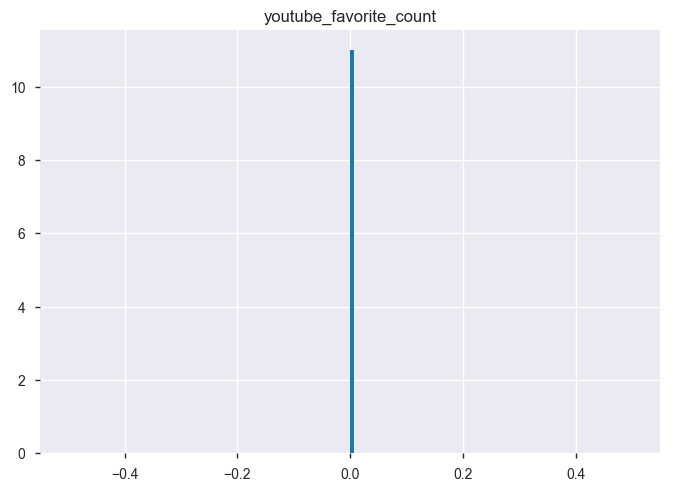

In [48]:
plot_data_set = pd.DataFrame({'youtube_favorite_count': data_set.youtube_favorite_count}, columns=['youtube_favorite_count'])
plot_data_set.hist(bins=150);

## Statistics Histograms <a class="anchor" id="statistics-histogram"></a>

### View Histogram <a class="anchor" id="views-histogram"></a>

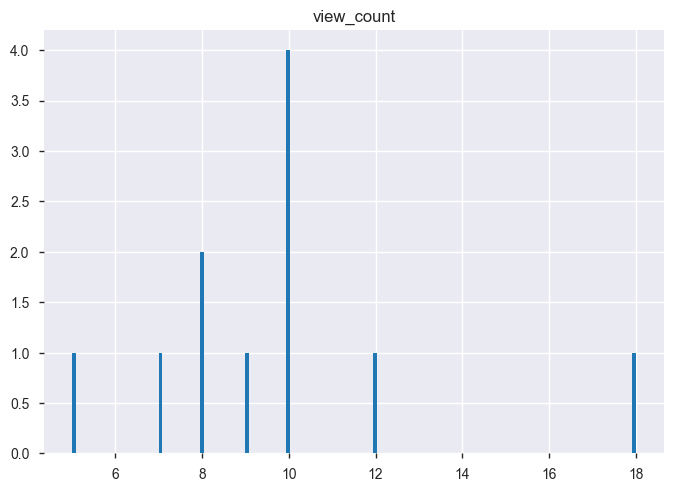

In [49]:
plot_data_set = pd.DataFrame({'view_count': data_set.view_count}, columns=['view_count'])
plot_data_set.hist(bins=150);

### Likes Histogram <a class="anchor" id="likes-histogram"></a>

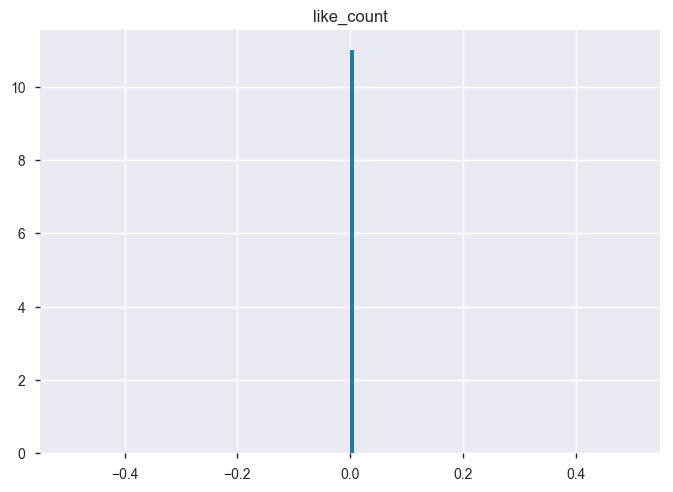

In [50]:
plot_data_set = pd.DataFrame({'like_count': data_set.like_count}, columns=['like_count'])
plot_data_set.hist(bins=150);

### Dislikes Histogram <a class="anchor" id="dislikes-histogram"></a>

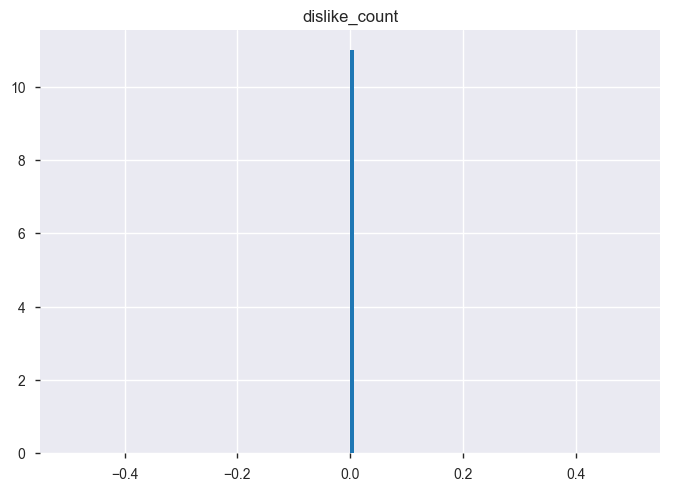

In [51]:
plot_data_set = pd.DataFrame({'dislike_count': data_set.dislike_count}, columns=['dislike_count'])
plot_data_set.hist(bins=150);

### Favorites Histogram <a class="anchor" id="favorites-histogram"></a>

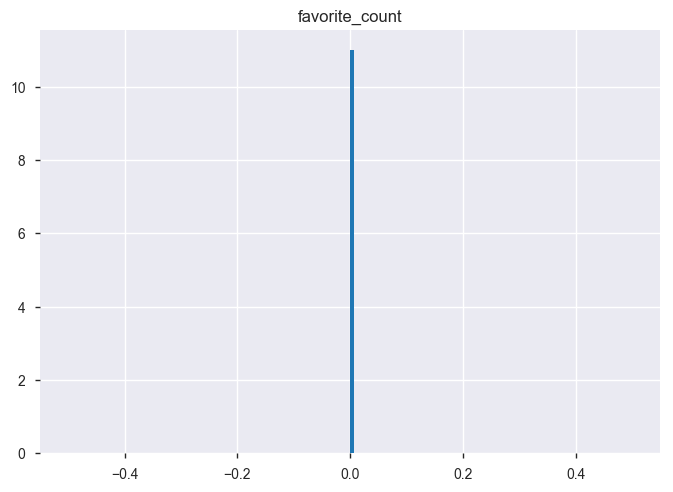

In [52]:
plot_data_set = pd.DataFrame({'favorite_count': data_set.favorite_count}, columns=['favorite_count'])
plot_data_set.hist(bins=150);